Linear Regression Model Project

In [1]:
# Import necessay libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# assign the external data sheet a variable
dataset = pd.read_csv('student_scores.csv')

In [2]:
# Explore our dataset
dataset.shape

(25, 2)

In [3]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Explore the statistical details of the dataset
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


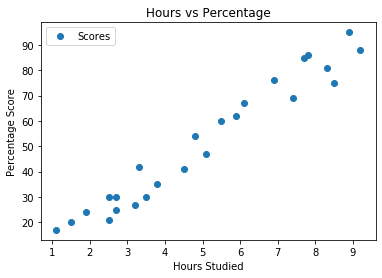

In [5]:
# plot our data points to see if we can manually find any relationship between the data
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [6]:
# Prepare the data with the Hours column as the attribute and the Percentage column as the label
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [7]:
# sckit-learn implementation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
# Model initialization
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
# Make predictions using the testing set
y_pred = regression_model.predict(X_test)

In [10]:
# compare the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [11]:
# model evaluation

from sklearn import metrics
# The absolute mean error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

# The mean squared error
print('Mean squared error:',
      metrics.mean_squared_error(y_test, y_pred))

# The root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# The coefficient
print('Slope: \n', regression_model.coef_)

# The intercept
print('Intercept:', regression_model.intercept_)

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination:',
      metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean squared error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
Slope: 
 [9.91065648]
Intercept: 2.018160041434683
Coefficient of determination: 0.9454906892105356


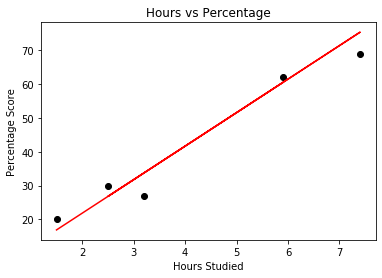

In [12]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

plt.plot(X_test, y_pred, color='r')
plt.show()
